In [3]:
import pandas as pd

# Load Database from CSV
file_path = 'data/Jobs_Data.csv'
jobs_data = pd.read_csv(file_path)

In [4]:
jobs_data

,Column1,Job Title,Company Name,Location,Location1,Salary,Salary_range,Job Description,Latitude,Longitude
0,0,Cloud Data Migration Engineer Contract 80-95hr...,Direct IT Recruiting Inc.,Toronto,"Toronto, Ontario, Canada",150K - 180K,>150K,"NOTE: Hybrid work model, 2 days/week in Toront...",43.651070,-79.347015
1,1,IT Leader,Roma Moulding,Woodbridge,"Woodbridge, Ontario, Canada",80K - 120K,80K - 100K,"Hi, this is Tony Gareri, the CEO of our amazin...",43.779979,-79.599716
2,3,IT Security Administrator,Spicers Canada ULC,Vaughan,"Vaughan, Ontario, Canada",58K - 75K,35K - 60K,Backed by a fifth-generation family-owned comp...,43.856100,-79.508300
3,4,Business Solutions Architect- Market Risk Tech...,BMO Financial Group,Toronto,"Toronto, Ontario, Canada",75K - 139K,60K - 80K,"100 King Street West Toronto Ontario,M5X 1A1\n...",43.651070,-79.347015
4,5,Technical Support Specialist,Connectability,North York,"North York, Ontario, Canada",70K - 85K,60K - 80K,Who is Connectability? Who do we work with?Con...,43.761539,-79.411079
...,...,...,...,...,...,...,...,...,...,...
2041,156,Sr. Engineer - Data Security Governance,Slate Technologies,Toronto,"Toronto, Ontario, Canada",65K - 130K,60K - 80K,Sr. Engineer - Data Security Governance\nLocat...,43.651070,-79.347015
2042,157,Senior Electrical Commissioning Engineer (Data...,CAI,Toronto,"Toronto, Ontario, Canada",91K - 107K,80K - 100K,THIS IS NOT A DATA ENGINEERING RELATED POSITIO...,43.651070,-79.347015
2043,158,Senior Data Engineer (Security Cleared),Quantexa,Ottawa,"Ottawa, Ontario, Canada",96K - 105K,80K - 100K,What we?re all about.\nIt isn?t often you get ...,45.421500,-75.697200
2044,160,"Senior Data Engineer, Mapping",Lyft,Toronto,"Toronto, Ontario, Canada",137K - 140K,120K - 150K,"At Lyft, our purpose is to serve and connect. ...",43.651070,-79.347015


In [6]:
if 'Job Description' in jobs_data.columns:
    job_descriptions = jobs_data['Job Description']
    print("Job Description:")
    print(job_descriptions.head())

Job Description:
0    NOTE: Hybrid work model, 2 days/week in Toront...
1    Hi, this is Tony Gareri, the CEO of our amazin...
2    Backed by a fifth-generation family-owned comp...
3    100 King Street West Toronto Ontario,M5X 1A1\n...
4    Who is Connectability? Who do we work with?Con...
Name: Job Description, dtype: object


In [13]:
import re
from collections import Counter

# Function to extract skills from a text
def extract_skills(description, skill_keywords):
    found_skills = [skill for skill in skill_keywords if skill.lower() in description.lower()]
    return found_skills

# List of common skills
common_skills = [
    "Python", "Java", "SQL", "Excel", "PowerPoint", "AWS", "Azure", "GCP", "Linux",
    "Windows", "Agile", "Scrum", "Project Management", "Data Analysis", "Machine Learning",
    "Communication", "Leadership", "Problem Solving", "Time Management", "C++", "JavaScript",
    "Big Data", "Data visualization", "Programming languages", "Statistics","teamwork", "collaboration", 
    "adaptability", "persuasion","positive attitude","self-motivation","active listening","flexibility",
    "patience","emotional intelligence", "creativity", "empathy", "negotiation",
    "critical thinking", "decision-making","stress management","trustworhiness","attention to detail","initiative"
]

# Apply skill extraction on each row
jobs_data['Extracted Skills'] = jobs_data['Job Description'].apply(lambda x: extract_skills(str(x), common_skills))

# Count the most frequent skills
all_skills = [skill for skills in jobs_data['Extracted Skills'] for skill in skills]
skills_frequency = Counter(all_skills)
print("The most frequent skills:")
for skill, count in skills_frequency.most_common():
    print(f"{skill}: {count}")



The most frequent skills:
Communication: 1432
Excel: 1293
initiative: 769
collaboration: 670
Leadership: 609
SQL: 587
Python: 498
Data Analysis: 435
attention to detail: 402
Project Management: 364
AWS: 355
Agile: 318
flexibility: 301
decision-making: 281
Azure: 264
Machine Learning: 256
Problem Solving: 227
Statistics: 212
Data visualization: 200
teamwork: 195
PowerPoint: 187
Java: 176
creativity: 162
Time Management: 155
Windows: 151
Programming languages: 131
critical thinking: 116
Big Data: 110
GCP: 109
Linux: 89
Scrum: 84
JavaScript: 80
negotiation: 79
adaptability: 64
C++: 45
positive attitude: 22
empathy: 19
active listening: 10
patience: 9
emotional intelligence: 6
self-motivation: 5
persuasion: 1
stress management: 1


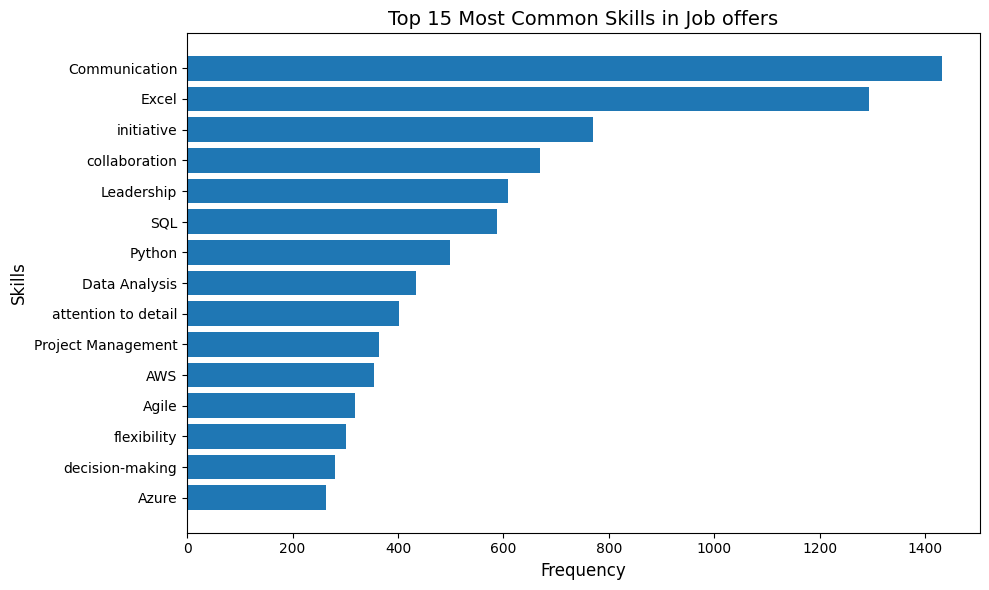

In [17]:
import matplotlib.pyplot as plt

# Get the 15 most common skills
top_skills = skills_frequency.most_common(15)

# Separate the skills and their frequencies
skills, frequencies = zip(*top_skills)

# Create and show the bar chart
plt.figure(figsize=(10, 6))
plt.barh(skills, frequencies)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.title('Top 15 Most Common Skills in Job offers', fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para que el más frecuente esté arriba
plt.tight_layout()
plt.show()
